In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
import model, analysis, util, implicit_curve

In [3]:
import importlib
util = importlib.reload(util)
analysis = importlib.reload(analysis)
implicit_curve = importlib.reload(implicit_curve)
model = importlib.reload(model)
compute = True

## Contour Plot of the Asymmetry in the Parameter Space for fixed $f_a$

In [7]:
f_a = 3e14
H_inf = 2e10
name = "vary_sigma_eff_eta_B.pkl"
if compute:
    m_a_s, Gamma_phi_s, eta_B_analytical, eta_B_numerical = util.load_data("paper_eta_B.pkl")
    _, _, eta_B_numerical_smaller_sigma = analysis.sample_parameter_space_numerical(f_a, H_inf, 
        kwargs=dict(bg_kwargs=dict(sigma_eff=model.paper_sigma_eff / 10)))
    _, _, eta_B_numerical_larger_sigma = analysis.sample_parameter_space_numerical(f_a, H_inf, 
        kwargs=dict(bg_kwargs=dict(sigma_eff=model.paper_sigma_eff * 10)))                                                                           
    util.save_data(name, eta_B_numerical_smaller_sigma, eta_B_numerical_larger_sigma)
else:
    eta_B_numerical_smaller_sigma, eta_B_numerical_larger_sigma = util.load_data(name)

/home/jana/Documents/master-project/axion_spg/model.py:268: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/axion_spg/model.py:268: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: overflow encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


In [17]:
def make_contour_plot(eta_B, sigma_eff, filename=None, show=True):
    levels = np.sort(np.concatenate([np.arange(-13, -7 + 1), [np.log10(model.eta_B_observed)]]))

    # numerical result
    CS2 = plt.contour(m_a_s, Gamma_phi_s, np.log10(eta_B), levels=levels)
    plt.colorbar().set_label(r"$\log_{10} \eta_B^0$")
    CS2.collections[np.where(CS2.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")

    # labels
    plt.xscale("log"); plt.yscale("log")
    plt.xlabel(r"$m_a / \mathrm{GeV}$")
    plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
    plt.tight_layout()
    plt.title(f"$\\sigma_\\mathrm{{eff}} = {sigma_eff:e} \\mathrm{{GeV}}^2$")
    if filename is not None: 
        plt.savefig(util.make_plot_path(filename))
    if show:
        plt.show()

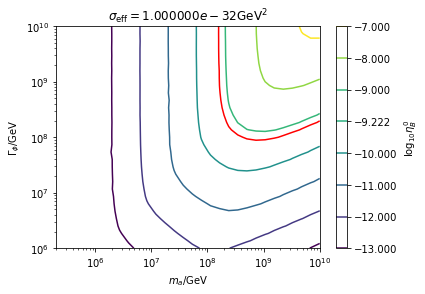

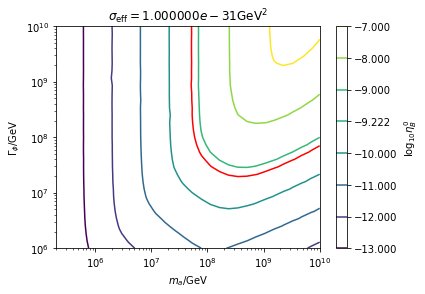

<ipython-input-17-abc432bbb3d5>:5: RuntimeWarning: invalid value encountered in log10
  CS2 = plt.contour(m_a_s, Gamma_phi_s, np.log10(eta_B), levels=levels)


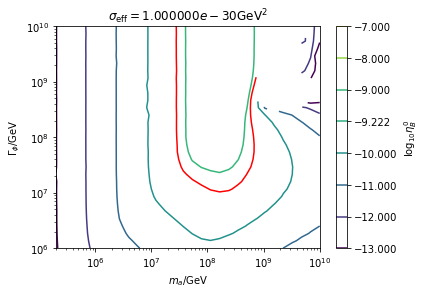

In [18]:
make_contour_plot(eta_B_numerical_smaller_sigma, model.paper_sigma_eff / 10)
make_contour_plot(eta_B_numerical,               model.paper_sigma_eff)
make_contour_plot(eta_B_numerical_larger_sigma,  model.paper_sigma_eff * 10)

Text(0, 0.5, '$\\Gamma_\\phi / \\mathrm{GeV}$')

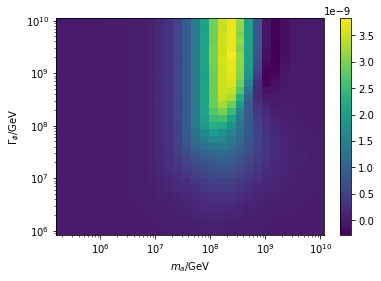

In [16]:
plt.pcolormesh(m_a_s, Gamma_phi_s, eta_B_numerical_larger_sigma, shading="auto")
plt.colorbar()
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_a / \mathrm{GeV}$")
plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")

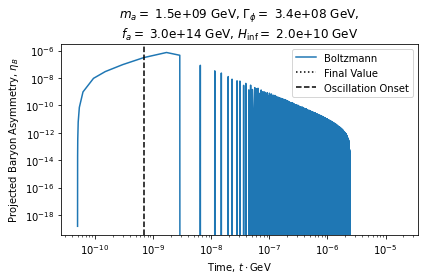

axion oscillations: 4615
final asymmetry: -1.6036756776952166e-12


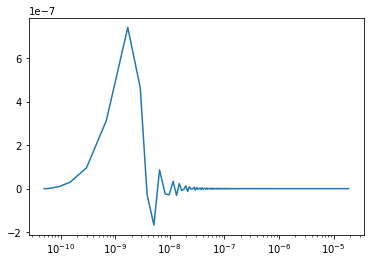

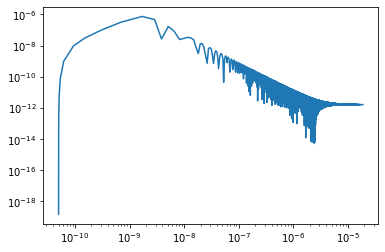

In [29]:
Gamma_a_idx, m_a_idx = np.where(eta_B_numerical_larger_sigma < 0)
negativ_m_a = m_a_s[m_a_idx][0]
negative_Gamma_phi = Gamma_phi_s[Gamma_a_idx][0]
sol = analysis.make_time_plots(negativ_m_a, f_a, negative_Gamma_phi, H_inf, 
                         sigma_eff=model.paper_sigma_eff * 10, fixed_samples=False, show_all=False)
plt.semilogx(sol.t, model.n_L_to_eta_B_final(sol.T, sol.n_L))
plt.show()
plt.loglog(sol.t, np.abs(model.n_L_to_eta_B_final(sol.T, sol.n_L)))

## Correct Asymmetry as a Function of $f_a$

In [32]:
name = "high_sigma_eff_curves.pkl"
if compute:
    f_a_list = [2e10, 4e10, 1e13, 1e14]
    curves = [analysis.compute_correct_curve(f_a, model.calc_H_inf_max(f_a) / 10, 
                                            bg_kwargs=dict(sigma_eff=model.paper_sigma_eff * 10)) 
              for f_a in tqdm(f_a_list)]
    util.save_data(name, f_a_list, curves)
else:
    f_a_list, curves = util.load_data(name)

/home/jana/Documents/master-project/axion_spg/model.py:268: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/axion_spg/model.py:272: RuntimeWarning: overflow encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


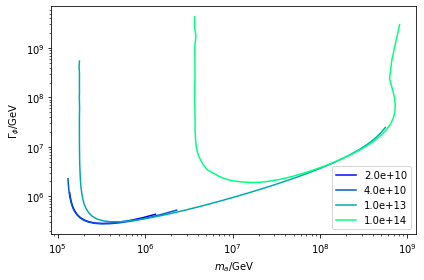

In [33]:
cmap = plt.get_cmap("winter")
for x, f_a, (curve_m_a, curve_Gamma_phi) in zip(np.linspace(0, 1, len(f_a_list)), f_a_list, curves):
    if len(curve_m_a) == 1:
        plt.plot(curve_m_a, curve_Gamma_phi, "or", label=f"{f_a:.1e}")
    plt.plot(curve_m_a, curve_Gamma_phi, color=cmap(x), label=f"{f_a:.1e}")
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_a / \mathrm{GeV}$")
plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
#scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(f_a_list), vmax=max(f_a_list)))
#cbar = plt.colorbar(scalar_map)
#cbar.set_label(r"$f_a / \mathrm{GeV}$") # TODO: the colorbar is not correct!!!!
plt.legend()
plt.tight_layout()
plt.savefig(util.make_plot_path("correct_eta_B_curves_high_sigma.pdf"))

In [34]:
print(f"minimum: m_a = {min(curves[0][0]):e}, Gamma_phi = {min(curves[0][1]):e}")

minimum: m_a = 1.366926e+05, Gamma_phi = 2.820741e+05
